In [72]:
#Cargamos los datos con los que se hará el entrenamiento con ayuda de la biblioteca Panda
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Datos_labels.csv')
clases=data[['Class']]
data.head()
print(clases)

     Class
0        a
1        a
2        a
3        a
4        a
...    ...
1250     z
1251     z
1252     z
1253     z
1254     z

[1255 rows x 1 columns]


In [29]:
data.describe()

,D1,D2,D3,D4,D5
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,-20.248344,208.399629,169.270564,-37.839790,-28.087061
std,26.777386,102.954130,146.028027,30.014071,15.419459
min,-63.182941,-24.070827,-26.450924,-64.001595,-56.012147
25%,-44.950554,168.646075,9.341445,-59.641212,-41.959310
50%,-13.547339,219.851140,180.881333,-54.261269,-26.563174
75%,-0.416435,287.555083,289.518672,-22.545703,-17.388496
max,78.274864,415.793995,455.305233,65.592847,18.632946


In [73]:
# Separamos las características (variable X) y las etiquetas (variable y) de cada muestra
X = data.get(['D1', 'D2', 'D3', 'D4', 'D5'])
Y = data.get(['Class'])
Y['Class'] = pd.factorize(Y['Class'])[0] + 0 #paso los clases de string a numero
print(X)


             D1          D2          D3         D4         D5
0     14.235882  355.639979  284.520624  19.209584 -47.313248
1     24.369166  347.734003  300.606733  26.875810 -43.708390
2     28.034400  393.865085  377.136105  48.119572 -33.019915
3     24.890606  379.896256  367.718164  36.635960 -39.800729
4     25.461866  362.341993  329.944920  23.851280 -40.992274
...         ...         ...         ...        ...        ...
1250 -11.569252  207.868972   25.805175 -57.181839 -29.846467
1251 -12.883062  189.996501   47.009509 -56.847463 -29.951465
1252  -6.290862  207.840808   10.855783 -58.570811 -34.461086
1253  -6.089534  192.615461   54.214510 -55.270508 -25.842922
1254  -7.455263  196.134606   28.035368 -57.153182 -17.409328

[1255 rows x 5 columns]


In [31]:
print(Y)

      Class
0         0
1         0
2         0
3         0
4         0
...     ...
1250     26
1251     26
1252     26
1253     26
1254     26

[1255 rows x 1 columns]


<AxesSubplot:ylabel='Class'>

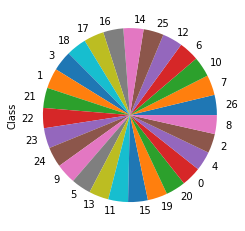

In [32]:
# Analiza los datos
porcentaje =pd.value_counts(Y['Class'])
porcentaje.plot.pie() # Distribución de Clases

<AxesSubplot:>

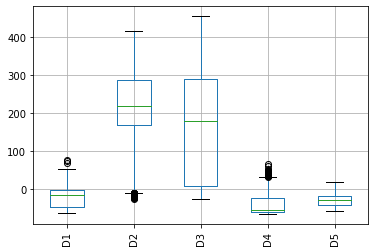

In [25]:
X.boxplot(rot=90) # Boxplot para ver la distribución de las caracterisiticas

array([[<AxesSubplot:title={'center':'D1'}>,
        <AxesSubplot:title={'center':'D2'}>],
       [<AxesSubplot:title={'center':'D3'}>,
        <AxesSubplot:title={'center':'D4'}>],
       [<AxesSubplot:title={'center':'D5'}>, <AxesSubplot:>]],
      dtype=object)

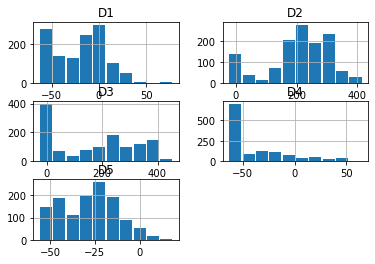

In [26]:
X.hist(rwidth=0.9)

<AxesSubplot:xlabel='D3', ylabel='D4'>

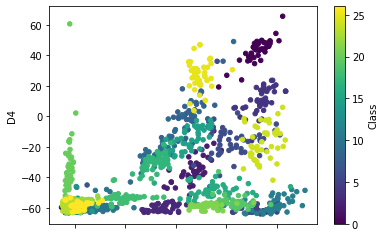

In [33]:
data = X.join(Y)              #combinamos entrada y salida
data.plot.scatter(x="D3",
                      y="D4",
                      c="Class",
                      colormap='viridis')
                      #DIAGRAMA DE DISPERSION D4 VS D3

<AxesSubplot:xlabel='D4', ylabel='D5'>

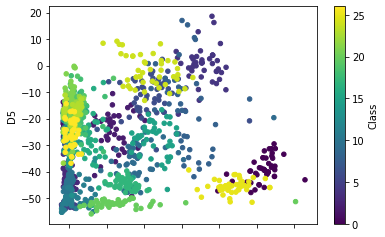

In [34]:
data.plot.scatter(x="D4",
                      y="D5",
                      c="Class",
                      colormap='viridis')
                      #DIAGRAMA DE DISPERSION D5 VS D2

<AxesSubplot:xlabel='D3', ylabel='D5'>

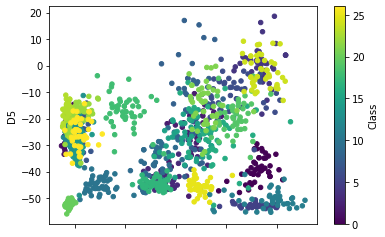

In [8]:
data.plot.scatter(x="D3",
                      y="D5",
                      c="Class",
                      colormap='viridis')
                      #DIAGRAMA DE DISPERSION D5 VS D2

In [9]:
data.corr(method ='spearman') # se usa la correlacion de Spearman ya que en los histogramas se puede ver que las caracteristicas no tienen una distribución normal.

,D1,D2,D3,D4,D5,Class
D1,1.000000,0.429465,0.204418,-0.092570,0.117223,0.018460
D2,0.429465,1.000000,0.785928,0.306337,0.111890,0.005640
D3,0.204418,0.785928,1.000000,0.454257,0.054507,-0.207266
D4,-0.092570,0.306337,0.454257,1.000000,0.122762,0.017524
D5,0.117223,0.111890,0.054507,0.122762,1.000000,0.139588
Class,0.018460,0.005640,-0.207266,0.017524,0.139588,1.000000


In [77]:
# Realiza una preparación de los datos.

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


pca=PCA(n_components=2)
X_PCA=pca.fit_transform(X) # PCA a nuestras caracteristicas

X_norm=normalize(X, norm='l1') #Normalizar los datos
X_norm =pd.DataFrame(X_norm)
scaler = StandardScaler()
X_standard= scaler.fit_transform(X)
X_standard=pd.DataFrame(X_standard) # estandarizar los datos
X_stand_PCA= scaler.fit_transform(X_PCA)
X_stand_PCA=pd.DataFrame(X_stand_PCA) 

<AxesSubplot:xlabel='0', ylabel='1'>

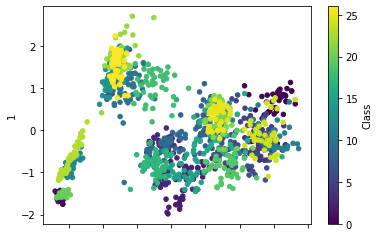

In [78]:
data_norm = X_stand_PCA.join(Y)             #Observamos la grafica de PC1 y PC2
data_norm.plot.scatter(x=0,
                      y=1,
                      c="Class",
                      colormap='viridis')
                         #D3 y D5


<AxesSubplot:xlabel='4', ylabel='2'>

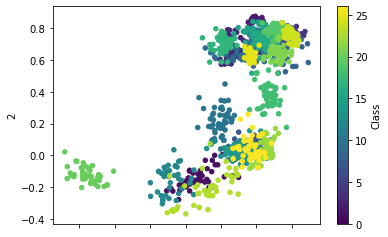

In [11]:

data_norm = X_norm.join(Y)              #combinamos entrada y salida D1=0, D2=1, D3=2, D4=3, D5=4
data_norm.plot.scatter(x=4,
                      y=2,
                      c="Class",
                      colormap='viridis')
                         #D3 y D5

<AxesSubplot:xlabel='2', ylabel='4'>

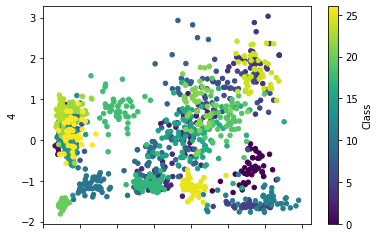

In [83]:
data_stand = X_standard.join(Y)              #combinamos entrada y salida D1=0, D2=1, D3=2, D4=3, D5=4
data_stand.plot.scatter(x=2,
                      y=4,
                      c="Class",
                      colormap='viridis')
                      #D3 y D5

In [69]:
from sklearn.model_selection import RepeatedKFold # Validación cruzada por k particiones
import tensorflow as tf 
from tensorflow import keras
from keras.utils import to_categorical

#x=X[['D3','D5']] #Seleccion de variables por su diagrama de dispersion y corr.

# Modelo de una red neuronal con tensorflow
modelo_clasificacion = tf.keras.models.Sequential([         
    tf.keras.layers.Flatten(),  # Capa inicial
    tf.keras.layers.Dense(100, activation=tf.nn.sigmoid), #Capa oculta
    tf.keras.layers.Dense(100, activation=tf.nn.sigmoid), #Capa ocualta
    tf.keras.layers.Dense(27, activation=tf.nn.sigmoid)]) #Salida

modelo_clasificacion.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Parámetros
rd = 42
particiones = 10
repeticiones = 3

rkf = RepeatedKFold(n_splits=particiones, n_repeats=repeticiones, random_state=rd)

for train_idx, test_idx in rkf.split(X,y):
  #Creamos los conjuntos iterativamente con los index
  X_train, X_test, y_train, y_test = X.iloc[list(train_idx)], X.iloc[list(test_idx)], y.iloc[list(train_idx)],  y.iloc[list(test_idx)]
 #Implementamos red neuronal con Validación cruzada 
  modelo_clasificacion.fit(X_train, to_categorical(y_train), epochs =30)



=======] - 0s 2ms/step - loss: 0.1185 - accuracy: 0.9575
Epoch 9/30
36/36 [==============================] - 0s 2ms/step - loss: 0.1147 - accuracy: 0.9575
Epoch 10/30
36/36 [==============================] - 0s 2ms/step - loss: 0.1087 - accuracy: 0.9557
Epoch 11/30
36/36 [==============================] - 0s 2ms/step - loss: 0.1102 - accuracy: 0.9575
Epoch 12/30
36/36 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9504
Epoch 13/30
36/36 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.9548
Epoch 14/30
36/36 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9477
Epoch 15/30
36/36 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9424
Epoch 16/30
36/36 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.9398
Epoch 17/30
36/36 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.9593
Epoch 18/30
36/36 [==============================] - 

In [70]:
#verificación de calsificador con x_test
for train_idx, test_idx in rkf.split(X,y):
     X_train, X_test, y_train, y_test = X.iloc[list(train_idx)], X.iloc[list(test_idx)], y.iloc[list(train_idx)],  y.iloc[list(test_idx)]
     modelo_clasificacion.evaluate(X_test, to_categorical(y_test)) 


4/4 [==============================] - 0s 1ms/step - loss: 0.1067 - accuracy: 0.9760


In [72]:
#Guardamos red entrenada
modelo_clasificacion.save('Machine_Learning_lenguaje_de_señales')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Machine_Learning_lenguaje_de_señales\assets


In [99]:
# Cargamos los datos de la clave. Los que deberá estimar el modelo que se entrena.

X_key = pd.read_csv('Key.csv')
X_key.head()
print(X_key)

          D1          D2          D3         D4         D5
0 -15.186825  189.881661   13.408352 -61.470166 -25.659869
1 -36.941558  177.793604  225.740325 -18.784012 -27.943222
2   4.087684  303.834517  402.954803 -51.325593 -50.602977
3  31.730905  388.928116  360.357617  46.585921 -31.422896
4  -8.900491   24.902589  -22.608917 -59.505357 -27.068942
5 -58.984276  281.628164  259.362374 -56.893885 -20.695995
6 -22.556504  179.670815   -3.759250 -58.789003 -30.237960
7 -38.931583  121.170042  180.165690 -58.393436 -42.407191
8 -34.748407  164.537240  217.124836 -10.595149 -37.580120


In [5]:
# Llamada del algoritmo de machine
import tensorflow as tf 
clf =tf.keras.models.load_model('Machine_Learning_lenguaje_de_señales')

In [6]:
def alfabeto_clases(y):
    import string
    import numpy as np
    n=dict(zip(range(0,27),string.ascii_lowercase))
    z=y.flatten()
    z=z.tolist()
    for i in z:
        print(n[i])

In [101]:
import numpy as np
#Decifrado de clave  ### LA CLAVE ES holamundo
y_key = clf.predict(X_key)
clave=alfabeto_clases(np.argmax(y_key,axis=1)) #Pasa la clases de numero (0 a 26) a letras del alfabeto (a-z)
clave=np.transpose(clave)

h
p
l
a
m
v
n
d
p


In [22]:

y_key = clf.predict(X.iloc[12:30,:])
clave=alfabeto_clases(np.argmax(y_key,axis=1)) #Pasa la clases de numero (0 a 26) a letras del alfabeto (a-z)
clave=np.transpose(clave)

a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
